In [1]:
# imports
import mne
import os
import os.path as op
from mne.preprocessing import ICA
from mne.channels import make_standard_montage
from autoreject import AutoReject
import numpy as np


### Load the data

In [7]:
folderpath = r'/home/hyruuk/GitHub/cocolab/neurotheque_pilots/data/acquisition'
filename = 'sub-01_ses-001_raw.edf'
filepath = op.join(folderpath, filename)

if '.edf' in filename:
    # Load the raw data
    raw = mne.io.read_raw_edf(filepath, preload=True, stim_channel='Trigger')

    ## Do some preparation steps
    # Get all channel names
    channel_names = raw.info['ch_names']
    print("Channel Names:", channel_names)
    
    # Define non-EEG channels to exclude
    non_eeg_channels = ['EEG X1:ECG-Pz', 'EEG X2:-Pz', 'EEG X3:-Pz', 'CM', 'EEG A1-Pz', 'EEG A2-Pz']
    # Check which non-EEG channels are present
    existing_non_eeg = [ch for ch in non_eeg_channels if ch in channel_names]
    print("Non-EEG Channels to Exclude:", existing_non_eeg)
    # Drop non-EEG channels
    raw.drop_channels(existing_non_eeg)
    print("Channels after exclusion:", raw.info['ch_names'])

    # Identify EEG channels
    eeg_channels = [ch for ch in raw.info['ch_names'] if 'EEG' in ch]
    print("EEG Channels Before Renaming:", eeg_channels)
    # Create a mapping by removing 'EEG ' prefix and '-Pz' suffix
    rename_mapping = {ch: ch.replace('EEG ', '').replace('-Pz', '') for ch in eeg_channels}
    print("Rename Mapping:", rename_mapping)
    # Rename channels
    raw.rename_channels(rename_mapping)
    print("EEG Channels After Renaming:", [ch for ch in raw.info['ch_names'] if ch in rename_mapping.values()])

    # Set channel types
    for ch in raw.info['ch_names']:
        if ch in rename_mapping.values():
            raw.set_channel_types({ch: 'eeg'})
        elif 'Trigger' in ch:
            raw.set_channel_types({ch: 'stim'})
        else:
            raw.set_channel_types({ch: 'misc'})  # For any other channels, if any remain
    print("Channel Types:", raw.get_channel_types())
    # Apply standard 10-20 montage
    montage = make_standard_montage('standard_1020')
    raw.set_montage(montage)
    print(raw.info['dig'])


elif '.fif' in filename:
    # do something else
    print(filepath)


Extracting EDF parameters from /home/hyruuk/GitHub/cocolab/neurotheque_pilots/data/acquisition/sub-01_ses-001_raw.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1135799  =      0.000 ...  3785.997 secs...
Channel Names: ['EEG P3-Pz', 'EEG C3-Pz', 'EEG F3-Pz', 'EEG Fz-Pz', 'EEG F4-Pz', 'EEG C4-Pz', 'EEG P4-Pz', 'EEG Cz-Pz', 'CM', 'EEG A1-Pz', 'EEG Fp1-Pz', 'EEG Fp2-Pz', 'EEG T3-Pz', 'EEG T5-Pz', 'EEG O1-Pz', 'EEG O2-Pz', 'EEG X3:-Pz', 'EEG X2:-Pz', 'EEG F7-Pz', 'EEG F8-Pz', 'EEG X1:ECG-Pz', 'EEG A2-Pz', 'EEG T6-Pz', 'EEG T4-Pz', 'Pz', 'Trigger', 'Event']
Non-EEG Channels to Exclude: ['EEG X1:ECG-Pz', 'EEG X2:-Pz', 'EEG X3:-Pz', 'CM', 'EEG A1-Pz', 'EEG A2-Pz']
Channels after exclusion: ['EEG P3-Pz', 'EEG C3-Pz', 'EEG F3-Pz', 'EEG Fz-Pz', 'EEG F4-Pz', 'EEG C4-Pz', 'EEG P4-Pz', 'EEG Cz-Pz', 'EEG Fp1-Pz', 'EEG Fp2-Pz', 'EEG T3-Pz', 'EEG T5-Pz', 'EEG O1-Pz', 'EEG O2-Pz', 'EEG F7-Pz', 'EEG F8-Pz', 'EEG T6-Pz', 'EEG T4-Pz', 'Pz', 'Trigge

/tmp/ipykernel_117204/370376912.py:40: RuntimeWarning: The unit for channel(s) Pz has changed from V to NA.
  raw.set_channel_types({ch: 'misc'})  # For any other channels, if any remain
/tmp/ipykernel_117204/370376912.py:38: RuntimeWarning: The unit for channel(s) Trigger has changed from NA to V.
  raw.set_channel_types({ch: 'stim'})
/tmp/ipykernel_117204/370376912.py:40: RuntimeWarning: The unit for channel(s) Event has changed from V to NA.
  raw.set_channel_types({ch: 'misc'})  # For any other channels, if any remain
/tmp/ipykernel_117204/370376912.py:44: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['Pz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


### Clean the data

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 991 samples (3.303 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1981 samples (6.603 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Not setting metadata
3786 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3786 events and 301 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


1 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/18 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/18 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/3785 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/3785 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/3785 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/3785 [00:00<?,       ?it/s]

/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/mne/bem.py:1115: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1
Fitting ICA to data using 18 channels (please be patient, this may take a while)


/tmp/ipykernel_117204/3973884576.py:25: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  random_state=0).fit(epochs_for_autoreject[~ar_log.bad_epochs], decim=3)


Selecting by explained variance: 11 components
Fitting ICA took 1.1s.
Creating RawArray with float64 data, n_channels=11, n_times=1135800
    Range : 0 ... 1135799 =      0.000 ...  3785.997 secs
Ready.
Using qt as 2D backend.


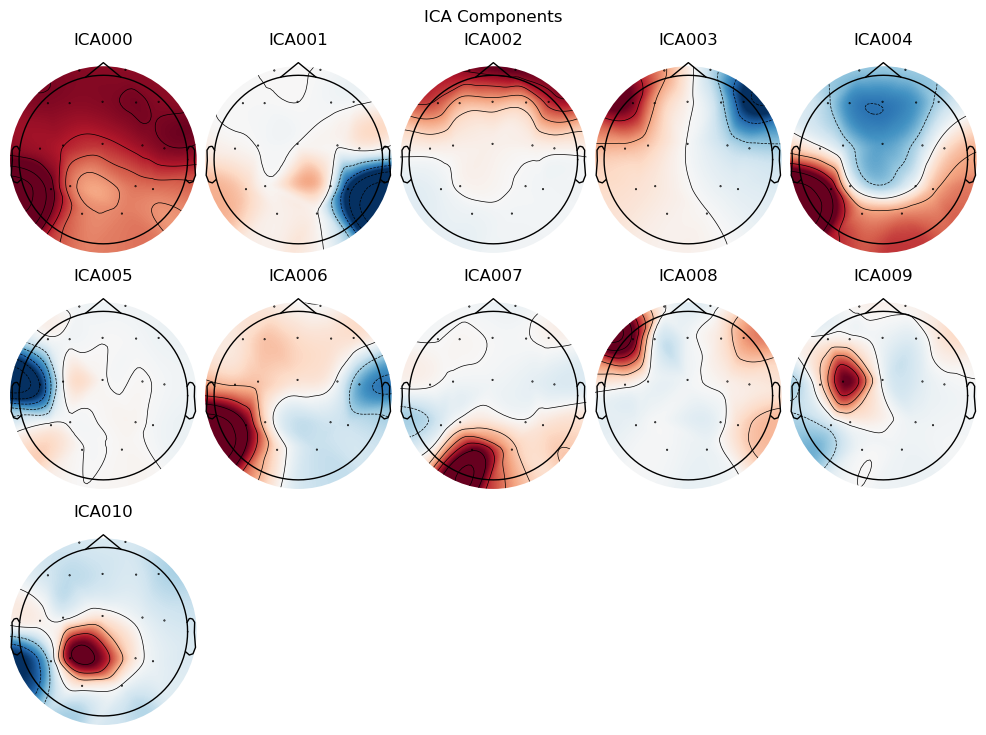

In [ ]:
## Filter
# Apply band-pass filter from 0.5 Hz to 100 Hz
raw_filtered = raw.copy().filter(l_freq=1, h_freq=100, fir_design='firwin')
# Apply notch filter at 60 Hz
raw_filtered.notch_filter(freqs=[60,120], fir_design='firwin')

## Dummy segment for autoreject
# Create fake events
events_for_autoreject = mne.make_fixed_length_events(raw, duration=1)
# Segment
epochs_for_autoreject = mne.Epochs(raw, events_for_autoreject, tmin=0, tmax=1, baseline=None, detrend=0, preload=True)

## Autoreject
# Initialize autoreject
ar = AutoReject()
# Fit autoreject
ar.fit(epochs_for_autoreject)

# Obtain list of bad epochs
ar_log = ar.get_reject_log(epochs_for_autoreject)
print(ar_log)



Fitting ICA to data using 18 channels (please be patient, this may take a while)


/tmp/ipykernel_117204/2752436012.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  random_state=0).fit(epochs_for_autoreject[~ar_log.bad_epochs], decim=3)


Selecting by explained variance: 11 components
Fitting ICA took 1.6s.
Creating RawArray with float64 data, n_channels=11, n_times=1135800
    Range : 0 ... 1135799 =      0.000 ...  3785.997 secs
Ready.


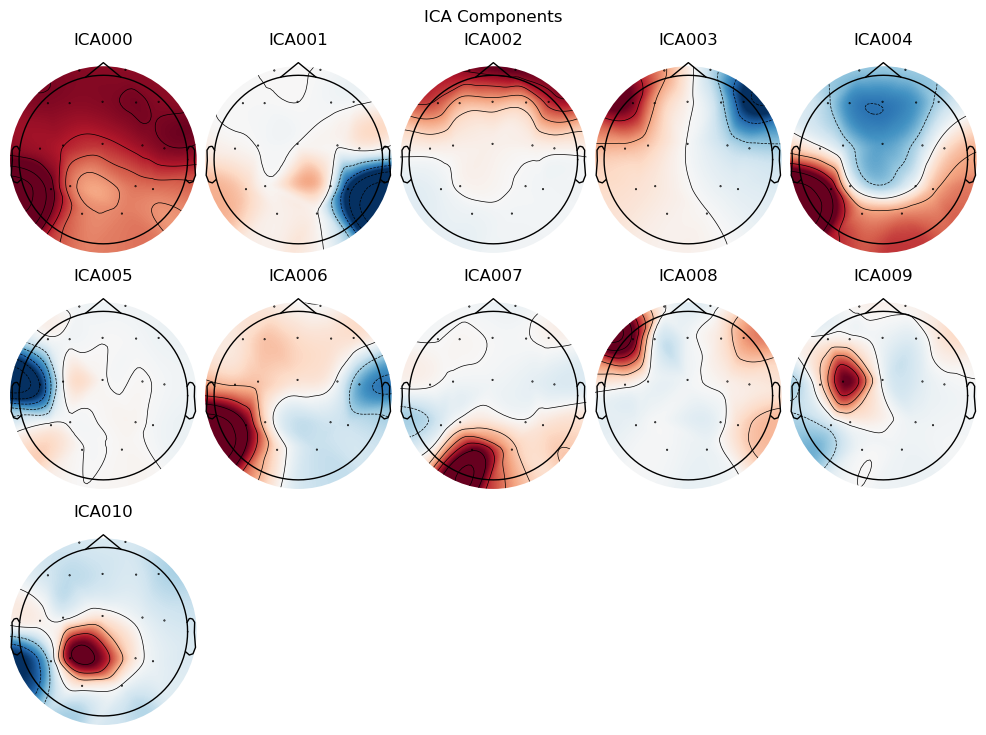

In [9]:
## Run ICA on clean data
ica = ICA(n_components=0.95, 
            random_state=0).fit(epochs_for_autoreject[~ar_log.bad_epochs], decim=3)
ica.plot_sources(raw_filtered, show=True)
ica.plot_components(title='ICA Components', show=True);

In [10]:
## Identify bad components
bad_components_indices = [1,2,3]  # Replace with actual bad components. Here, I identified the first component (IC000) as bad.
ica.exclude = bad_components_indices
print("Bad components:", bad_components_indices)

## Reconstruct data without bad components
raw_corrected = raw_filtered.copy()
ica.apply(raw_corrected)


## Rerun autoreject
# Initialize AutoReject with continuous mode
#ar = AutoReject(thresh_func='bayesian_optimization', n_jobs=-1)

# Fit and transform the raw data
#raw_clean = ar.fit_transform(raw_corrected)

Bad components: [1, 2, 3]
Applying ICA to Raw instance
    Transforming to ICA space (11 components)
    Zeroing out 3 ICA components
    Projecting back using 18 PCA components


<RawEDF | sub-01_ses-001_raw.edf, 21 x 1135800 (3786.0 s), ~182.0 MB, data loaded>

### Inspect the data

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 6.827 (s)
Plotting power spectral density (dB=True).


/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


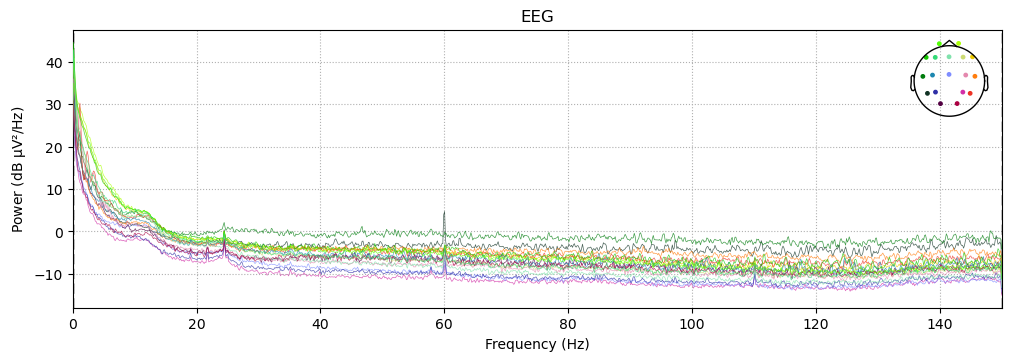

In [11]:
raw.plot_psd(average=False, show=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 6.827 (s)
Plotting power spectral density (dB=True).


/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


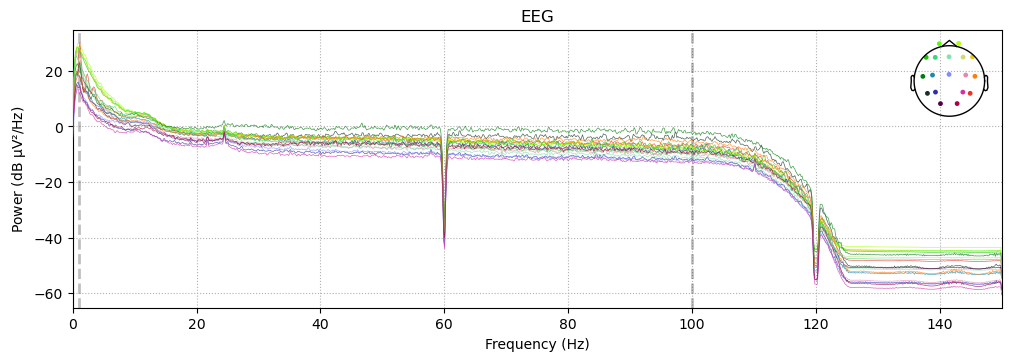

In [12]:
raw_filtered.plot_psd(average=False, show=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 6.827 (s)
Plotting power spectral density (dB=True).


/home/hyruuk/mambaforge/envs/neurotheque/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


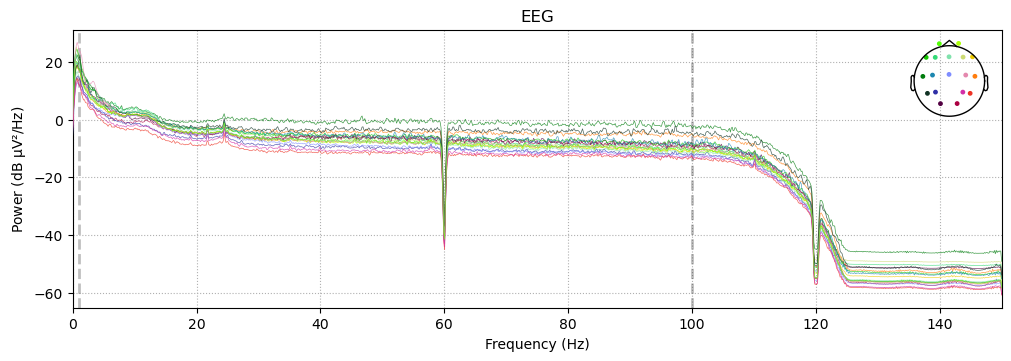

In [13]:
raw_corrected.plot_psd(average=False, show=True)

In [17]:
raw_corrected.save(op.join(folderpath, filename.replace('.edf', '_preprocessed.fif')), overwrite=True)

Writing /home/hyruuk/GitHub/cocolab/neurotheque_pilots/data/acquisition/sub-01_ses-001_raw_preprocessed.fif


/tmp/ipykernel_117204/3116129337.py:1: RuntimeWarning: This filename (/home/hyruuk/GitHub/cocolab/neurotheque_pilots/data/acquisition/sub-01_ses-001_raw_preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_corrected.save(op.join(folderpath, filename.replace('.edf', '_preprocessed.fif')), overwrite=True)


Closing /home/hyruuk/GitHub/cocolab/neurotheque_pilots/data/acquisition/sub-01_ses-001_raw_preprocessed.fif
[done]
